In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

import warnings
warnings.filterwarnings('ignore')

In [14]:
data = pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv')
data

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [26]:
# Rename the columns 
data.columns = [
    'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
    'Self_Employed', 'Applicant Income', 'CoapplicantIncome',
    'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
    'Property_Area', 'Loan_Status'
]

data = data.drop(columns=[col for col in data.columns if 'Unnamed' in col])

data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [27]:
data.shape

(613, 13)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            613 non-null    object 
 1   Gender             600 non-null    object 
 2   Married            610 non-null    object 
 3   Dependents         598 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      581 non-null    object 
 6   Applicant Income   613 non-null    int64  
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   599 non-null    float64
 10  Credit_History     563 non-null    float64
 11  Property_Area      613 non-null    object 
 12  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [29]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
Applicant Income      0
CoapplicantIncome     0
LoanAmount           21
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
data.describe()

,Applicant Income,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,613.000000,613.000000,592.000000,599.000000,563.000000
mean,5402.732463,1623.890571,146.412162,341.969950,0.841918
std,6114.004114,2927.903583,85.587325,65.170672,0.365142
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5780.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [31]:
# Drop Loan_ID as it's not needed for prediction
data = data.drop('Loan_ID', axis=1)

In [34]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [47]:
# Convert categorical variables to numeric format
label_encoders = {}
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [51]:
data.tail()

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
608,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
609,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
610,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
611,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1
612,0,0,0,0,1,4583,0.0,133.0,360.0,0.0,1,0


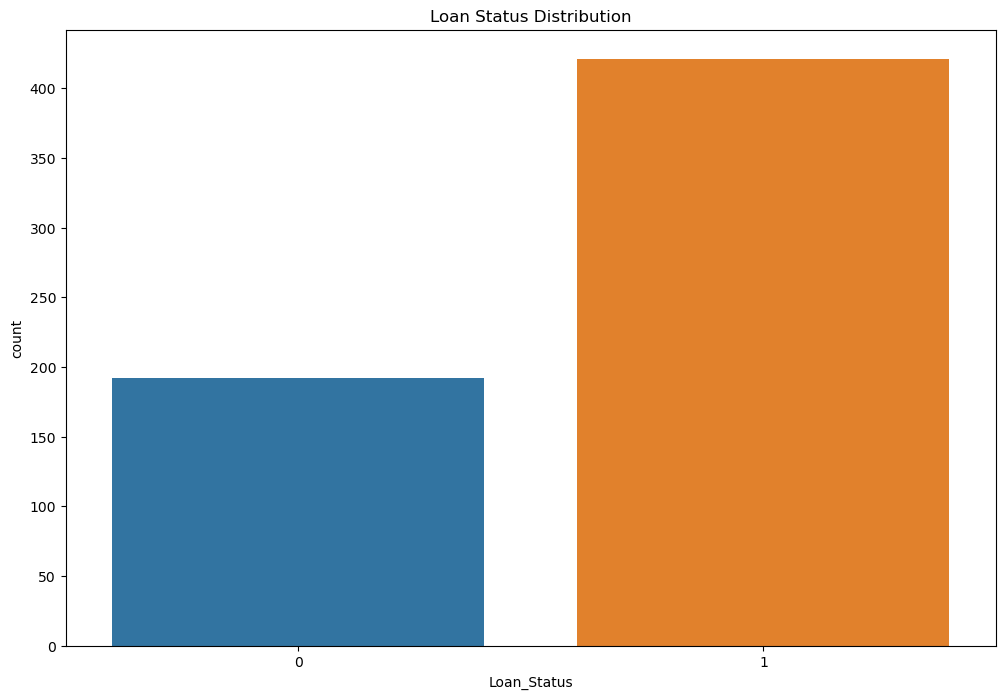

In [49]:
# Visualize the distributions of features and the target variable
plt.figure(figsize=(12, 8))
sns.countplot(x='Loan_Status', data=data)
plt.title('Loan Status Distribution')
plt.show()

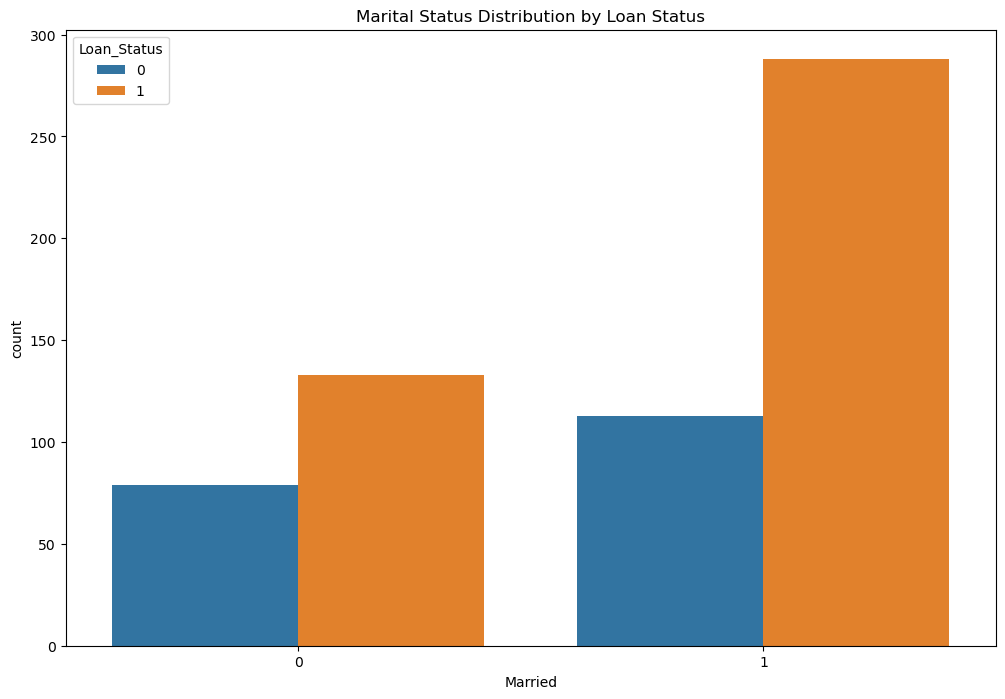

In [54]:
# Convert Loan_Status to string if necessary
data['Loan_Status'] = data['Loan_Status'].astype(str)

plt.figure(figsize=(12, 8))
sns.countplot(x='Married', hue='Loan_Status', data=data)
plt.title('Marital Status Distribution by Loan Status')
plt.show()

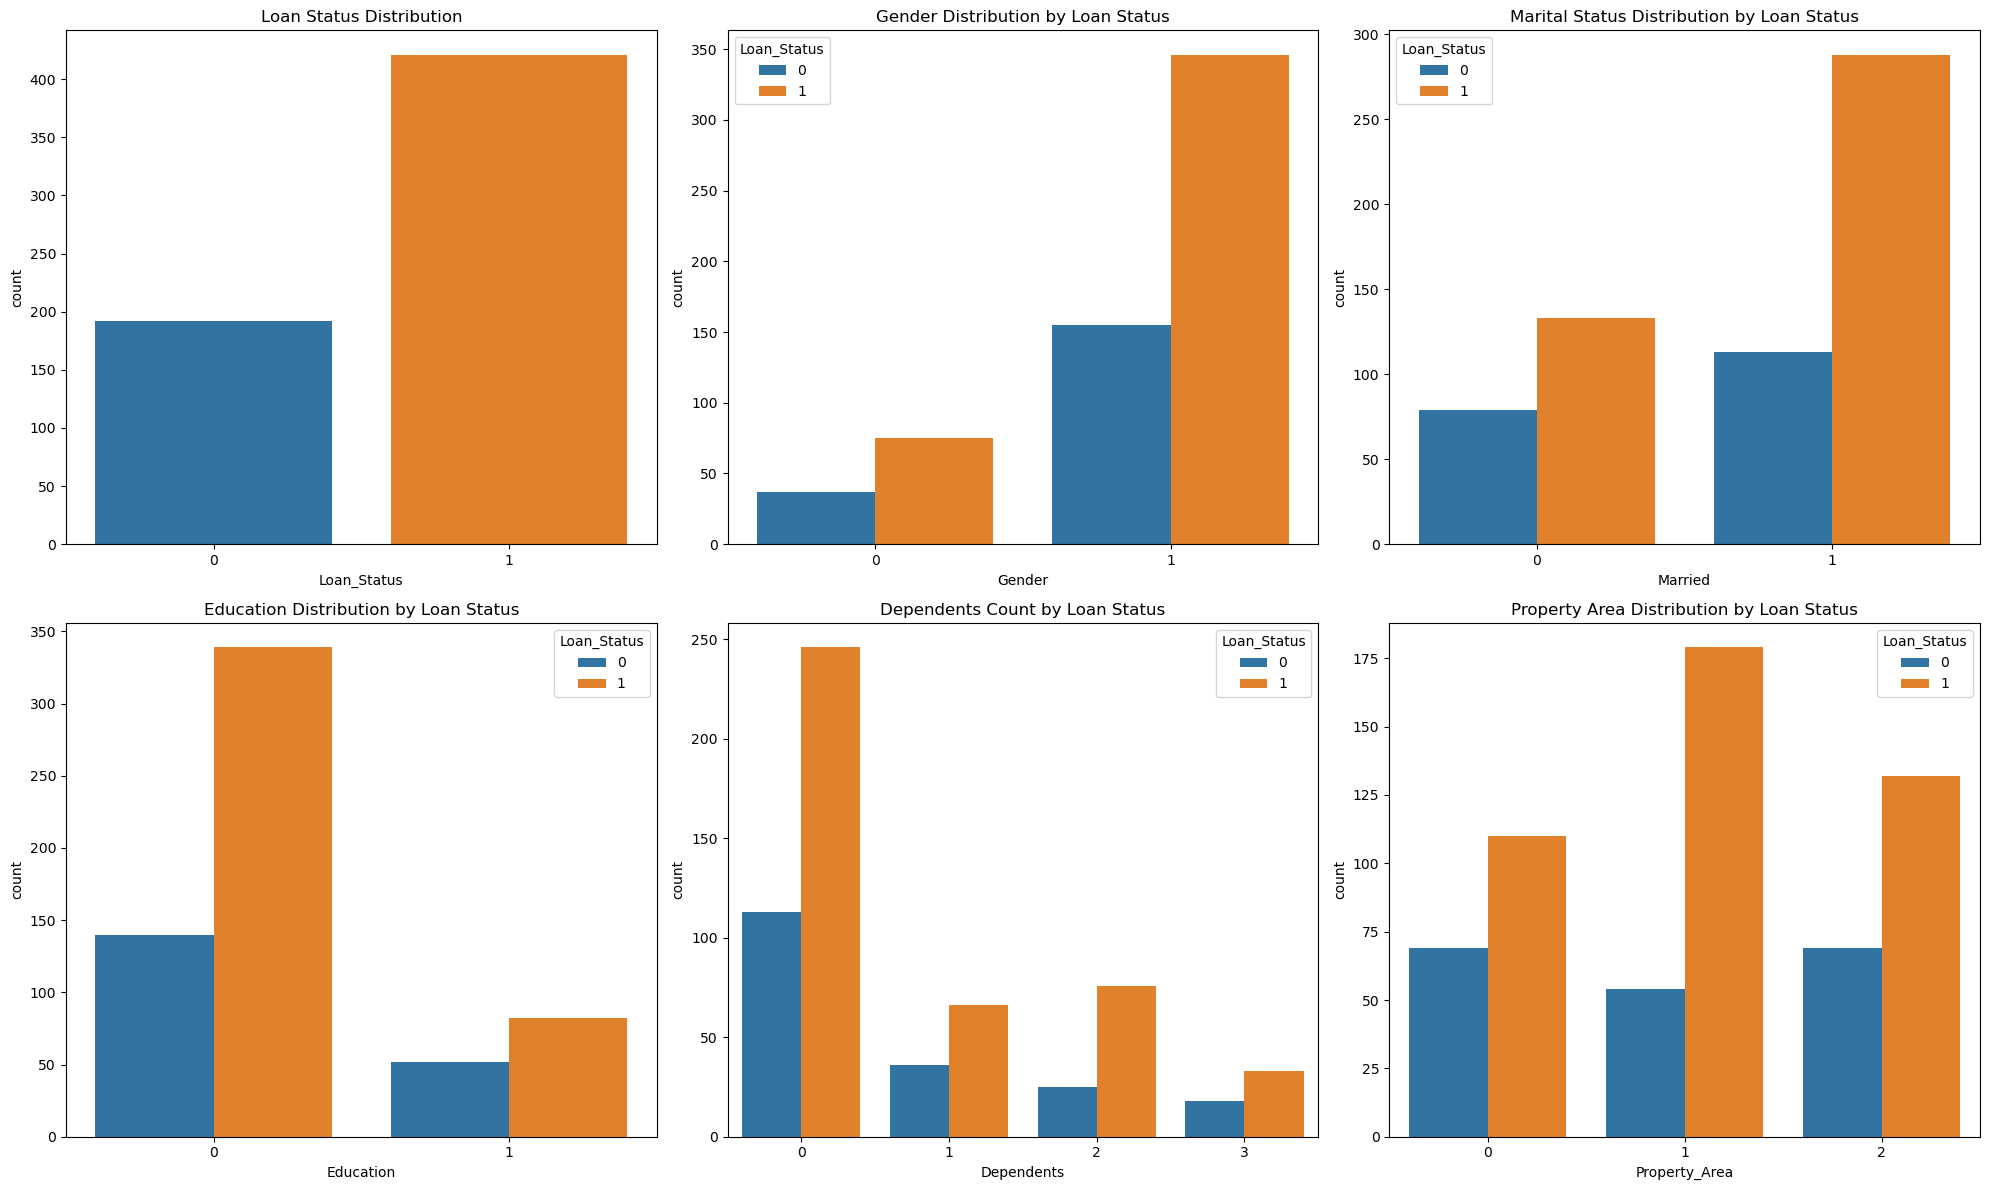

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

sns.countplot(x='Loan_Status', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Loan Status Distribution')

sns.countplot(x='Gender', hue='Loan_Status', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution by Loan Status')

sns.countplot(x='Married', hue='Loan_Status', data=data, ax=axes[0, 2])
axes[0, 2].set_title('Marital Status Distribution by Loan Status')

sns.countplot(x='Education', hue='Loan_Status', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Education Distribution by Loan Status')

sns.countplot(x='Dependents', hue='Loan_Status', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Dependents Count by Loan Status')

sns.countplot(x='Property_Area', hue='Loan_Status', data=data, ax=axes[1, 2])
axes[1, 2].set_title('Property Area Distribution by Loan Status')

plt.tight_layout()


In [63]:
# Split the data into features and target
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

In [65]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Build the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [71]:
y_pred = rf_model.predict(X_test)

In [72]:
y_pred

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0',
       '1', '0', '1', '0', '1', '1', '0', '0', '1', '1', '1', '1', '1',
       '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0',
       '0', '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '1', '1',
       '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1',
       '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1',
       '1', '1', '1', '1', '1', '1'], dtype=object)

In [75]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_res = classification_report(y_test, y_pred)
confusion_matrix_res = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_res)
print("Confusion Matrix:")
print(confusion_matrix_res)

Accuracy: 0.7967479674796748
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.43      0.56        37
           1       0.80      0.95      0.87        86

    accuracy                           0.80       123
   macro avg       0.80      0.69      0.71       123
weighted avg       0.80      0.80      0.78       123

Confusion Matrix:
[[16 21]
 [ 4 82]]


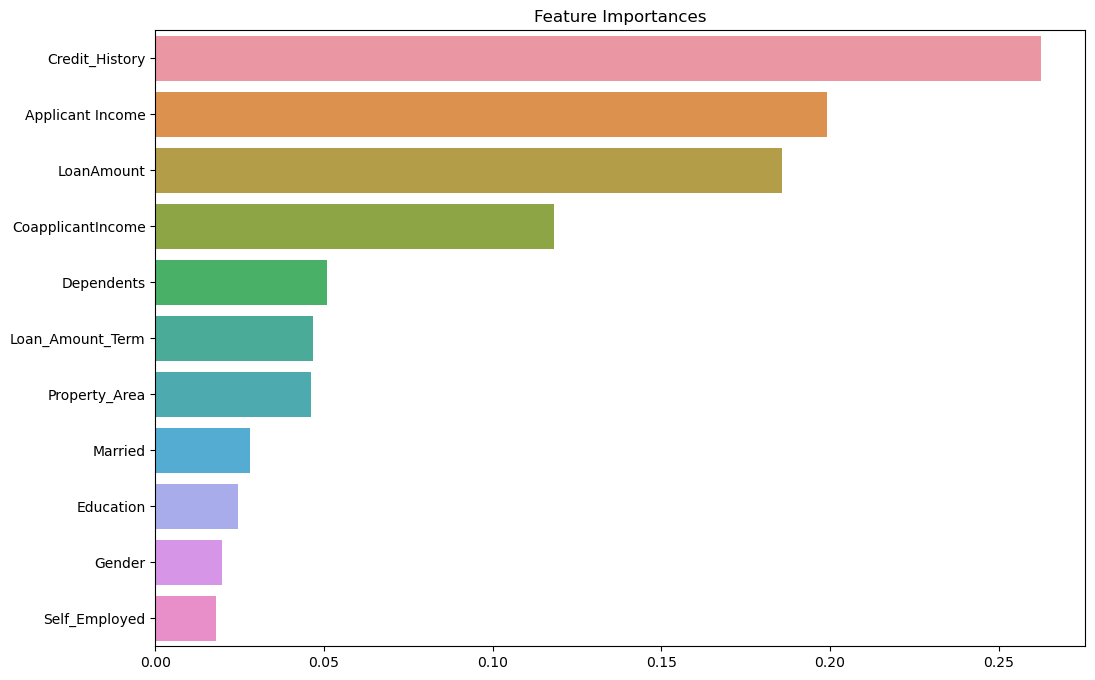

In [76]:
# Visualize feature 
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances')
plt.show()